In [1]:
%run "libraries.ipynb"

from IPython.display import display, HTML

In [2]:
pages_editors_graph = nx.read_gexf("data/pages-editors.gexf")

In [3]:
bots = [ n for n in pages_editors_graph.nodes() if ("bot" in n.lower()) and not("p:") in n ]
print len(bots)

611


In [4]:
def table_to_html(data, cols=[]):
    html = "<table>"
    html += "<tr>"
    for column_content in cols:
        html += "<th>%s</th>" % (column_content)
    html += "</tr>"
    
    for d in data:
        html += "<tr>"
        for column_content in d:
            html += "<td>%s</td>" % (column_content)
        html += "</tr>"
    html += "</table>"
        
    return HTML(html)

In [5]:
data = []

bots = sorted(bots, key=lambda b: -pages_editors_graph.node[b]["revisions"])

col_names = ["bot name", "revisions", "edited pages", "revisions/page", "mean contribution", "first activity", "last activity"]

g = pages_editors_graph

for b in bots:
    link = u"<a href=\"http://en.wikipedia.org/wiki/User:{0}\" target=\"_blank\">{0}</a>".format(b.split(":")[1])
    r  = g.node[b]["revisions"]
    p  = len(pages_editors_graph[b])
    m  = np.mean(map(lambda p: float(g[b][p]["revisions"])/float(g.node[p]["revisions"]), g[b]))
    rp = float(r)/float(p)
    f_rev = g.node[b]["first revision"]
    l_rev = g.node[b]["last revision"]
    data.append([link, r, p, rp, m, f_rev, l_rev])

count_all_rev = sum([ g.node[p]["revisions"] for p in pages_editors_graph.nodes() if g.node[p]["type"] == "page" ])
count_bots_rev = sum([ b[1] for b in data ])

print "total number of revisions: %s" % (count_all_rev)
print "revisions by all bots: %s (%s)" % (count_bots_rev, float(count_bots_rev)/float(count_all_rev) * 100)

display(table_to_html(data, col_names))

total number of revisions: 974476
revisions by all bots: 83522 (8.5709653188)


bot name,revisions,edited pages,revisions/page,mean contribution,first activity,last activity
ClueBot NG,12531,842,14.8824228029,0.0169268333568,2010-11-02 20:01:51,2015-03-31 22:55:36
ClueBot,7559,671,11.2652757079,0.00932440147676,2007-08-04 00:48:06,2010-12-02 19:12:31
SmackBot,7395,1313,5.63214013709,0.0184914492853,2006-03-04 21:44:13,2011-07-12 06:12:49
AnomieBOT,3546,876,4.04794520548,0.00796867670488,2008-08-26 20:03:25,2015-04-01 01:31:28
AntiVandalBot,2532,360,7.03333333333,0.00388003216406,2006-06-07 16:45:08,2007-04-02 15:47:20
Yobot,2277,1044,2.18103448276,0.0117839952683,2008-07-12 09:10:52,2015-04-01 06:41:21
VoABot II,1764,347,5.08357348703,0.00326131950476,2006-08-07 15:53:32,2009-10-06 13:14:59
Cydebot,1757,773,2.27296248383,0.0142603001248,2006-04-21 17:54:25,2015-03-21 18:02:38
Addbot,1617,1349,1.19866567828,0.0113331543073,2008-05-10 15:28:25,2013-08-21 04:22:40
YurikBot,1511,555,2.72252252252,0.00566249761741,2005-07-13 12:14:04,2006-08-28 13:01:34


In [6]:
df = pd.DataFrame(data=data, index=[ b.split(":")[1] for b in bots ], columns=col_names)

df.drop("bot name",1, inplace=True)

df.head()

,revisions,edited pages,revisions/page,mean contribution,first activity,last activity
ClueBot NG,12531,842,14.882423,0.016927,2010-11-02 20:01:51,2015-03-31 22:55:36
ClueBot,7559,671,11.265276,0.009324,2007-08-04 00:48:06,2010-12-02 19:12:31
SmackBot,7395,1313,5.632140,0.018491,2006-03-04 21:44:13,2011-07-12 06:12:49
AnomieBOT,3546,876,4.047945,0.007969,2008-08-26 20:03:25,2015-04-01 01:31:28
AntiVandalBot,2532,360,7.033333,0.003880,2006-06-07 16:45:08,2007-04-02 15:47:20


In [7]:
df.to_csv("data/bots.csv", encoding="utf-8")

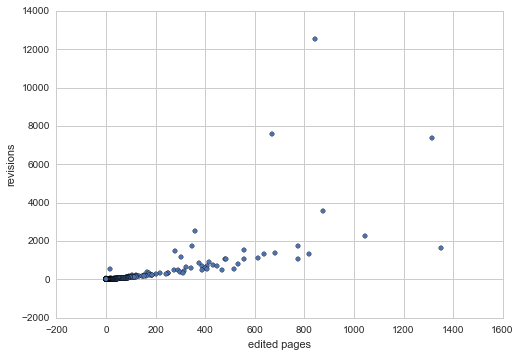

In [8]:
df.plot("edited pages", "revisions", kind="scatter");

## references

- https://books.google.fr/books?id=t5RpAgAAQBAJ (p.137-?)
- http://networkcultures.org/blog/publication/critical-point-of-view-a-wikipedia-reader/
- http://en.wikipedia.org/wiki/Wikipedia:Bot_policy
- http://www.davidribes.com/storage/Ribes%20Bowker%20-%20From%20Meaning%20to%20Machine.pdf
- http://www.davidribes.com/storage/Ribes%20Jackson%20et%20al%20-%20Artifacts%20that%20Organize.pdf
- http://www.davidribes.com/storage/Geiger%20Ribes%20-%20Sustaining%20Order%20in%20Wikipedia.pdf